### Student Details

Student name: 

Student ID:

In [157]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Implement Logistic Regression 

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [158]:
class AdalineGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

The plot_decision_boundary function definition

In [159]:
# From https://jonchar.net/notebooks/Artificial-Neural-Network-with-Keras/

import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    scatter = ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax, scatter

Plotting Logistic cost per epoch of training for Adaline

The accuracy score is 0.5


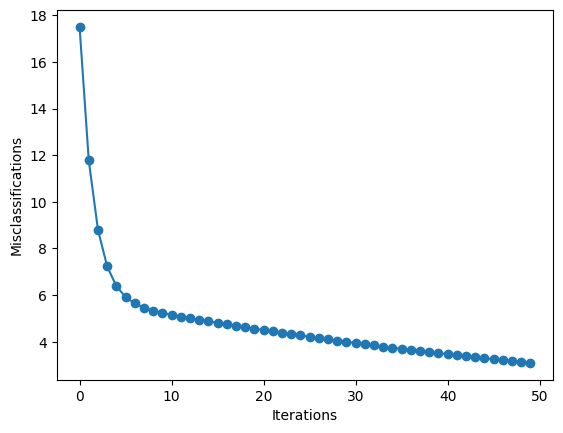

In [160]:
# from plot_decision_boundary import plot_decision_boundary
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('iris_data.csv', header=0)
################################
# Your code here

filtered_df = df.loc[(df[' class'] == "Iris-setosa") | (df[' class'] == "Iris-versicolor")]
X = filtered_df.iloc[:, [0, 2]]
y = filtered_df[' class']
y = np.where(y == "Iris-setosa", 0, 1)
ppn = AdalineGD(epochs=50, eta=0.0001) # using the perceptron defined by sklearn.linear_model with verbose = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

ppn.train(X_train, y_train) # fitting data to model

y_pred = ppn.predict(X_test) # getting the predicted data

from sklearn.metrics import accuracy_score

print("The accuracy score is", accuracy_score(y_test, y_pred)) # calculating accuracy

plt.plot(range(0, len(ppn.cost_)), ppn.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()




## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) + 
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

Using Stochastic Adaline approach to get a better plot of Logistic cost per epoch of training, and altering the cost function for Logistic Regression

<span style="color:red">Insert your code below</span>.

In [161]:
################################
# Class stub for you to fill the rest of the code

class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                
                output = self.activation(self.net_input(xi))
                cost = -target * np.log(output) + (1 - target) * np.log(1 - output)
                update = self.eta * cost
                self.w_[1:] += update * xi
                self.w_[0] += update
            
            self.cost_.append(cost)
        return self

    

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        # clip the activation function
        z = np.clip(z, -250, 250)
        return 1/(1 + np.exp(-z))

    def predict(self, X):
        outputNetInput = self.net_input(X)
        return np.where(self.activation(outputNetInput) >= 0.5, 1, 0)

Legend for Decision Boundary

In [162]:
def plot_legend() :
    plt.xlabel("Scaled Petal Length")
    plt.ylabel("Scaled Petal Width")
    plt.title("Scaled Iris Dataset")

    legend_labels = [plt.Line2D([0], [0], marker = 'o', color= 'black', label = 'Iris-setosa', markerfacecolor='skyblue', markersize=8),
                    plt.Line2D([0], [0], marker = 'o', color= 'black', label = 'Iris-versicolor', markerfacecolor='orange', markersize=8),
                    plt.Line2D([0], [0], marker = 'o', color= 'black', label = 'Iris-virginica', markerfacecolor='brown', markersize=8) ]
    plt.legend(handles=legend_labels, loc = 'upper right')
    plt.show()

plot of Logistic cost per epoch of training for Logistic regression and decision boundary plot

The accuracy score is 1.0
The model cost approaches 0 but not equal to 0 eg. [0.06004046141149824, 0.055596151994657485, 0.05172457030151709, 0.04832101757593197, 0.04530519207929708, 0.042614411928487674, 0.040198983538402705, 0.03801896495629298, 0.03604185756138893, 0.03424092909556269]


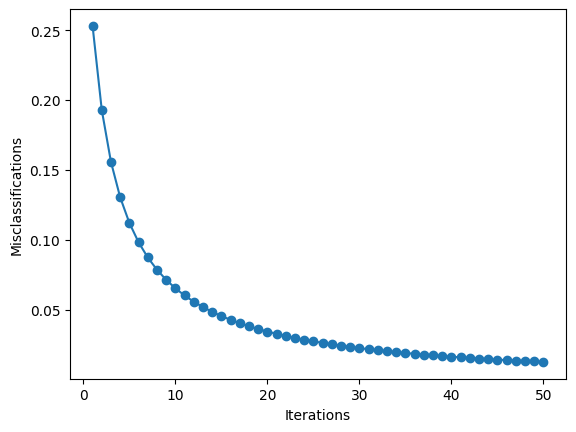

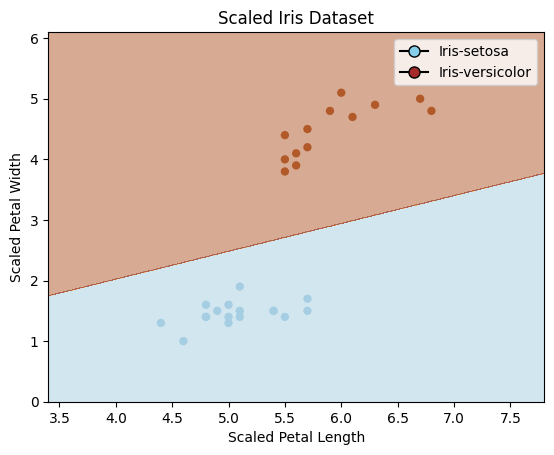

In [163]:
# from plot_decision_boundary import plot_decision_boundary
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('iris_data.csv', header=0)
################################
# Your code here

filtered_df = df.loc[(df[' class'] == "Iris-setosa") | (df[' class'] == "Iris-versicolor")]
X = filtered_df.iloc[:, [0, 2]].values
y = filtered_df[' class']
y = np.where(y == "Iris-setosa", 0, 1)

model = LogisticRegressionGD() # using the model we created above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model.train(X_train, y_train) # fitting data to model

y_pred = model.predict(X_test) # getting the predicted data


from sklearn.metrics import accuracy_score

print("The accuracy score is", accuracy_score(y_test, y_pred)) # calculating accuracy

print("The model cost approaches 0 but not equal to 0 eg.", model.cost_[10:20])
plt.plot(range(1, len(model.cost_)+1), model.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()
plot_decision_boundary(X_test, y_pred, model)
plt.xlabel("Scaled Petal Length")
plt.ylabel("Scaled Petal Width")
plt.title("Scaled Iris Dataset")

legend_labels = [plt.Line2D([0], [0], marker = 'o', color= 'black', label = 'Iris-setosa', markerfacecolor='skyblue', markersize=8),
                    plt.Line2D([0], [0], marker = 'o', color= 'black', label = 'Iris-versicolor', markerfacecolor='brown', markersize=8) ]
plt.legend(handles=legend_labels, loc = 'upper right')
plt.show()



# Task 2: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

<span style="color:red">Insert your code below</span>.

Create method to scale test and train data since its used throughout the file

In [164]:
from sklearn.preprocessing import StandardScaler
def scaleData(X_train, X_test) :
    # scaling train data and test data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)

    X_test_scaled = scaler.fit(X_test)
    X_test_scaled = scaler.transform(X_test)

    print("X_train_scaled ", X_train_scaled)
    print()
    print("X_test_scaled ", X_test_scaled)
    
    return X_train_scaled, X_test_scaled

X_train_scaled  [[-0.44283471 -0.13515309]
 [ 0.40257701  0.38088597]
 [-1.28824644 -1.1672312 ]
 [ 1.19162795  1.41296408]
 [ 0.17713389  0.12286644]
 [ 0.79710248  1.41296408]
 [-1.28824644 -1.42525073]
 [-1.23188566 -1.29624096]
 [-1.34460722 -1.29624096]
 [ 1.19162795  1.15494455]
 [ 0.7407417   1.02593479]
 [-1.34460722 -1.29624096]
 [-1.23188566 -1.29624096]
 [ 0.40257701  0.38088597]
 [ 0.00805154 -0.13515309]
 [ 1.24798874  0.76791526]
 [-1.23188566 -1.03822143]
 [-1.23188566 -1.29624096]
 [ 1.07890639  1.67098361]
 [ 0.57165936  0.76791526]
 [-1.28824644 -1.03822143]
 [ 0.62802014  0.76791526]
 [ 1.58615343  1.15494455]
 [ 1.64251421  1.02593479]
 [ 0.23349467 -0.00614332]
 [-1.34460722 -1.1672312 ]
 [-1.28824644 -1.03822143]
 [-1.400968   -1.03822143]
 [ 0.62802014  0.38088597]
 [ 0.1207731   0.12286644]
 [-1.28824644 -1.03822143]
 [-1.34460722 -1.1672312 ]
 [ 0.17713389 -0.26416285]
 [-0.10467002  0.12286644]
 [-1.34460722 -1.42525073]
 [-1.34460722 -1.1672312 ]
 [ 0.3462162

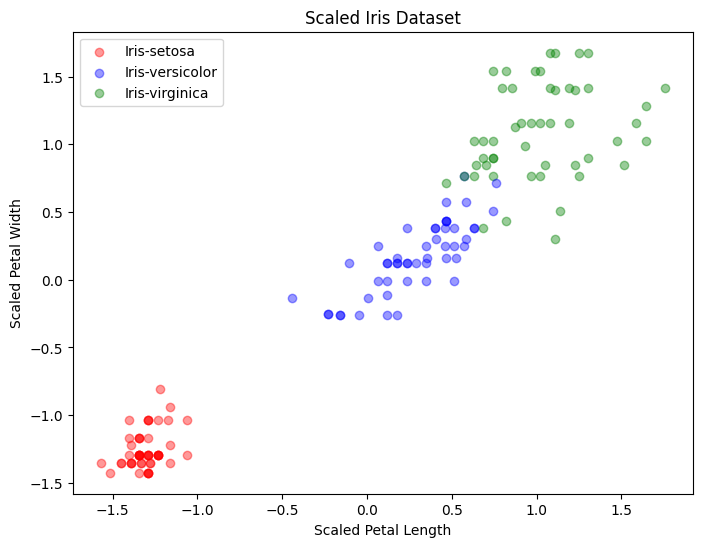

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


################################
# Your code here
df = pd.read_csv('iris_data.csv', header=0)
X = df.iloc[:, [2,3]]
y = df.iloc[:, 4]

class_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
y = df[' class'] = y.map(class_mapping)

model = LogisticRegression() # using the LogisticRegression provided by sklearn.linear_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# scaling train data and test data
X_train_scaled, X_test_scaled = scaleData(X_train, X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[y_train == 0][:, 0], X_train_scaled[y_train == 0][:, 1], label="Iris-setosa", c="red", alpha = 0.4)      # plot the Iris-setosa train data as red
plt.scatter(X_train_scaled[y_train == 1][:, 0], X_train_scaled[y_train == 1][:, 1], label="Iris-versicolor", c="blue", alpha = 0.4) # plot the Iris-versicolor train data as blue
plt.scatter(X_train_scaled[y_train == 2][:, 0], X_train_scaled[y_train == 2][:, 1], label="Iris-virginica", c="green", alpha = 0.4) # plot the Iris-virginica train data as green

# plotting the same for test data rather than train data
plt.scatter(X_test_scaled[y_test == 0][:, 0], X_test_scaled[y_test == 0][:, 1], c="red", alpha = 0.4) 
plt.scatter(X_test_scaled[y_test == 1][:, 0], X_test_scaled[y_test == 1][:, 1], c="blue", alpha = 0.4)
plt.scatter(X_test_scaled[y_test == 2][:, 0], X_test_scaled[y_test == 2][:, 1], c="green", alpha = 0.4)

model.fit(X_train_scaled, y_train) # fitting the scaled data onto the model
y_pred = model.predict(X_test_scaled) # obtaining the predicted data

# plotting the scaled data
plt.xlabel("Scaled Petal Length")
plt.ylabel("Scaled Petal Width")
plt.title("Scaled Iris Dataset")
plt.legend()
plt.show()




Calling plot_decision_boundary with the test data and the ypred with legend

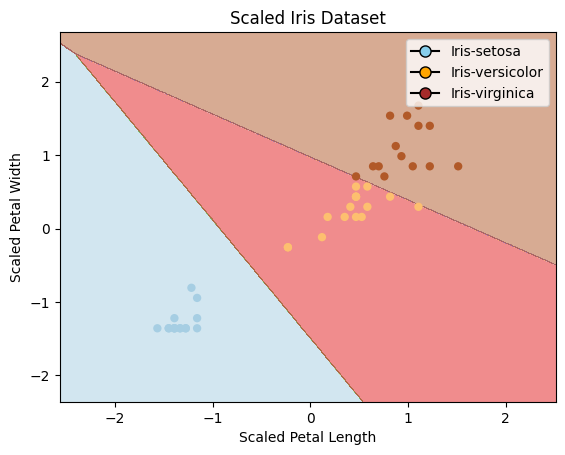

In [166]:
# from plot_decision_boundary import plot_decision_boundary

################################
# Your code here
plot_decision_boundary(X_test_scaled, y_pred, model)
plot_legend()

<span style="color:red">Insert your text answers below</span>.

Calculating accuracy score

In [167]:
from sklearn.metrics import accuracy_score

print("The accuracy score is", accuracy_score(y_test, y_pred)) # calculating accuracy

The accuracy score is 0.9333333333333333


Using Logistic Regression with a C value to obtain greater accuracy and control the bias and variance

Smaller C value of .01
X_train_scaled  [[-0.44283471 -0.13515309]
 [ 0.40257701  0.38088597]
 [-1.28824644 -1.1672312 ]
 [ 1.19162795  1.41296408]
 [ 0.17713389  0.12286644]
 [ 0.79710248  1.41296408]
 [-1.28824644 -1.42525073]
 [-1.23188566 -1.29624096]
 [-1.34460722 -1.29624096]
 [ 1.19162795  1.15494455]
 [ 0.7407417   1.02593479]
 [-1.34460722 -1.29624096]
 [-1.23188566 -1.29624096]
 [ 0.40257701  0.38088597]
 [ 0.00805154 -0.13515309]
 [ 1.24798874  0.76791526]
 [-1.23188566 -1.03822143]
 [-1.23188566 -1.29624096]
 [ 1.07890639  1.67098361]
 [ 0.57165936  0.76791526]
 [-1.28824644 -1.03822143]
 [ 0.62802014  0.76791526]
 [ 1.58615343  1.15494455]
 [ 1.64251421  1.02593479]
 [ 0.23349467 -0.00614332]
 [-1.34460722 -1.1672312 ]
 [-1.28824644 -1.03822143]
 [-1.400968   -1.03822143]
 [ 0.62802014  0.38088597]
 [ 0.1207731   0.12286644]
 [-1.28824644 -1.03822143]
 [-1.34460722 -1.1672312 ]
 [ 0.17713389 -0.26416285]
 [-0.10467002  0.12286644]
 [-1.34460722 -1.42525073]
 [-1.34460722 -1

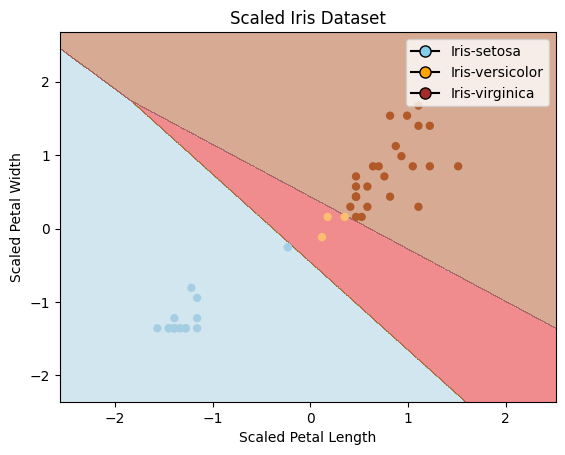

C value of 30
X_train_scaled  [[-0.44283471 -0.13515309]
 [ 0.40257701  0.38088597]
 [-1.28824644 -1.1672312 ]
 [ 1.19162795  1.41296408]
 [ 0.17713389  0.12286644]
 [ 0.79710248  1.41296408]
 [-1.28824644 -1.42525073]
 [-1.23188566 -1.29624096]
 [-1.34460722 -1.29624096]
 [ 1.19162795  1.15494455]
 [ 0.7407417   1.02593479]
 [-1.34460722 -1.29624096]
 [-1.23188566 -1.29624096]
 [ 0.40257701  0.38088597]
 [ 0.00805154 -0.13515309]
 [ 1.24798874  0.76791526]
 [-1.23188566 -1.03822143]
 [-1.23188566 -1.29624096]
 [ 1.07890639  1.67098361]
 [ 0.57165936  0.76791526]
 [-1.28824644 -1.03822143]
 [ 0.62802014  0.76791526]
 [ 1.58615343  1.15494455]
 [ 1.64251421  1.02593479]
 [ 0.23349467 -0.00614332]
 [-1.34460722 -1.1672312 ]
 [-1.28824644 -1.03822143]
 [-1.400968   -1.03822143]
 [ 0.62802014  0.38088597]
 [ 0.1207731   0.12286644]
 [-1.28824644 -1.03822143]
 [-1.34460722 -1.1672312 ]
 [ 0.17713389 -0.26416285]
 [-0.10467002  0.12286644]
 [-1.34460722 -1.42525073]
 [-1.34460722 -1.1672312 

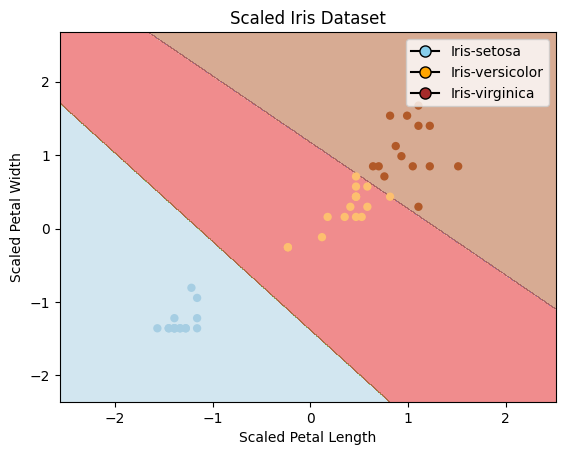

C value of 100
X_train_scaled  [[-0.44283471 -0.13515309]
 [ 0.40257701  0.38088597]
 [-1.28824644 -1.1672312 ]
 [ 1.19162795  1.41296408]
 [ 0.17713389  0.12286644]
 [ 0.79710248  1.41296408]
 [-1.28824644 -1.42525073]
 [-1.23188566 -1.29624096]
 [-1.34460722 -1.29624096]
 [ 1.19162795  1.15494455]
 [ 0.7407417   1.02593479]
 [-1.34460722 -1.29624096]
 [-1.23188566 -1.29624096]
 [ 0.40257701  0.38088597]
 [ 0.00805154 -0.13515309]
 [ 1.24798874  0.76791526]
 [-1.23188566 -1.03822143]
 [-1.23188566 -1.29624096]
 [ 1.07890639  1.67098361]
 [ 0.57165936  0.76791526]
 [-1.28824644 -1.03822143]
 [ 0.62802014  0.76791526]
 [ 1.58615343  1.15494455]
 [ 1.64251421  1.02593479]
 [ 0.23349467 -0.00614332]
 [-1.34460722 -1.1672312 ]
 [-1.28824644 -1.03822143]
 [-1.400968   -1.03822143]
 [ 0.62802014  0.38088597]
 [ 0.1207731   0.12286644]
 [-1.28824644 -1.03822143]
 [-1.34460722 -1.1672312 ]
 [ 0.17713389 -0.26416285]
 [-0.10467002  0.12286644]
 [-1.34460722 -1.42525073]
 [-1.34460722 -1.1672312

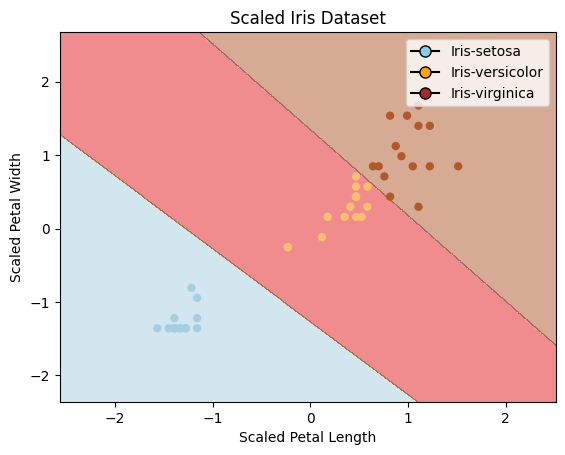

C value of 500
X_train_scaled  [[-0.44283471 -0.13515309]
 [ 0.40257701  0.38088597]
 [-1.28824644 -1.1672312 ]
 [ 1.19162795  1.41296408]
 [ 0.17713389  0.12286644]
 [ 0.79710248  1.41296408]
 [-1.28824644 -1.42525073]
 [-1.23188566 -1.29624096]
 [-1.34460722 -1.29624096]
 [ 1.19162795  1.15494455]
 [ 0.7407417   1.02593479]
 [-1.34460722 -1.29624096]
 [-1.23188566 -1.29624096]
 [ 0.40257701  0.38088597]
 [ 0.00805154 -0.13515309]
 [ 1.24798874  0.76791526]
 [-1.23188566 -1.03822143]
 [-1.23188566 -1.29624096]
 [ 1.07890639  1.67098361]
 [ 0.57165936  0.76791526]
 [-1.28824644 -1.03822143]
 [ 0.62802014  0.76791526]
 [ 1.58615343  1.15494455]
 [ 1.64251421  1.02593479]
 [ 0.23349467 -0.00614332]
 [-1.34460722 -1.1672312 ]
 [-1.28824644 -1.03822143]
 [-1.400968   -1.03822143]
 [ 0.62802014  0.38088597]
 [ 0.1207731   0.12286644]
 [-1.28824644 -1.03822143]
 [-1.34460722 -1.1672312 ]
 [ 0.17713389 -0.26416285]
 [-0.10467002  0.12286644]
 [-1.34460722 -1.42525073]
 [-1.34460722 -1.1672312

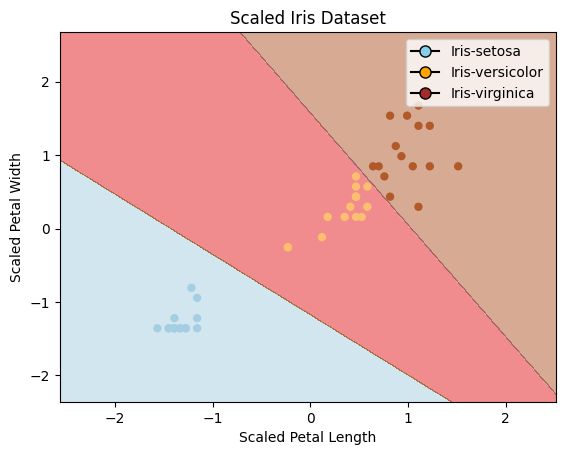

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

################################
# Your code here

def logisticRegressionWithCValue(c) :
    df = pd.read_csv('iris_data.csv', header=0)
    X = df.iloc[:, [2,3]]
    y = df.iloc[:, 4]

    class_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
    y = df[' class'] = y.map(class_mapping)

    clf = LogisticRegression(C = c)   # applying C value(parameter) to the LogisticRegression provided by sklearn.linear_model to get more accuracy


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # scaling train data and test data
    X_train_scaled, X_test_scaled = scaleData(X_train, X_test)
  
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    print("The accuracy score is", accuracy_score(y_test, y_pred)) # calculating accuracy NOTE: with the C value, the accuracy is improved

    ################################
    # Your code here
    plot_decision_boundary(X_test_scaled, y_pred, clf)
    plot_legend()


print("Smaller C value of .01")
logisticRegressionWithCValue(.01)

print("C value of 30")
logisticRegressionWithCValue(30)

print("C value of 100")
logisticRegressionWithCValue(100)

print("C value of 500")
logisticRegressionWithCValue(500)

Bias - error that is introduced by model's assumption between predictor variable and outcome variable  
Variance - error that is introduced by the model's variration to new data in the dataset/ fluctuation to meet with every predictor in the data

As I increase the value of 'C' from 0.01 to 100, I see the decision boundary changing as it denotes/controls the strength of the regularization penalty. The accuracy of the prediction varies with the value of C, as with a smaller value of C(stronger regularization), the variance decreases and bias increases, there by preventing the overfitting(high variance and low bias). ie the probability of decision boundary  becoming increasingly sensitive to any data inserted into the "dataset"(overfitting) is reduced.   

With a higher value of the C(weaker regularization), the variance increases and the bias decreases, which leads to preventing the decision boundary from NOT changing much with new data(underfitting). Hence the C controls the bias-variance tradeoff.  

# Task 3: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

<span style="color:red">Insert your code below</span>.

X_train_scaled  [[-0.44283471 -0.13515309]
 [ 0.40257701  0.38088597]
 [-1.28824644 -1.1672312 ]
 [ 1.19162795  1.41296408]
 [ 0.17713389  0.12286644]
 [ 0.79710248  1.41296408]
 [-1.28824644 -1.42525073]
 [-1.23188566 -1.29624096]
 [-1.34460722 -1.29624096]
 [ 1.19162795  1.15494455]
 [ 0.7407417   1.02593479]
 [-1.34460722 -1.29624096]
 [-1.23188566 -1.29624096]
 [ 0.40257701  0.38088597]
 [ 0.00805154 -0.13515309]
 [ 1.24798874  0.76791526]
 [-1.23188566 -1.03822143]
 [-1.23188566 -1.29624096]
 [ 1.07890639  1.67098361]
 [ 0.57165936  0.76791526]
 [-1.28824644 -1.03822143]
 [ 0.62802014  0.76791526]
 [ 1.58615343  1.15494455]
 [ 1.64251421  1.02593479]
 [ 0.23349467 -0.00614332]
 [-1.34460722 -1.1672312 ]
 [-1.28824644 -1.03822143]
 [-1.400968   -1.03822143]
 [ 0.62802014  0.38088597]
 [ 0.1207731   0.12286644]
 [-1.28824644 -1.03822143]
 [-1.34460722 -1.1672312 ]
 [ 0.17713389 -0.26416285]
 [-0.10467002  0.12286644]
 [-1.34460722 -1.42525073]
 [-1.34460722 -1.1672312 ]
 [ 0.3462162

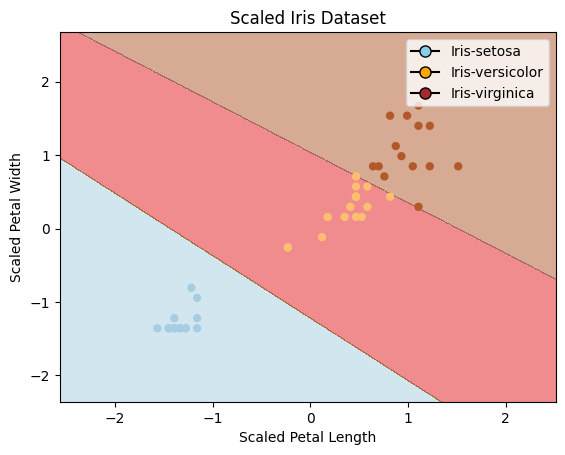

In [169]:
################################
# Your code here

import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

################################
# Your code here
df = pd.read_csv('iris_data.csv', header=0)
X = df.iloc[:, [2,3]]
y = df.iloc[:, 4]

class_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
y = df[' class'] = y.map(class_mapping)

# using svm.SVC with linear kernel
clf = svm.SVC(kernel='linear')

# using stratify to get 33% of each Iris data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# using standard scaler to fit the train and test data
# scaling train data and test data
X_train_scaled, X_test_scaled = scaleData(X_train, X_test)

clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)


print("The accuracy score with svm.SVC is", accuracy_score(y_test, y_pred)) # calculating accuracy

plot_decision_boundary(X_test_scaled, y_pred, clf) # plot decision boundary
plot_legend()



# Task 4: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Then:
* Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution 

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function 

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

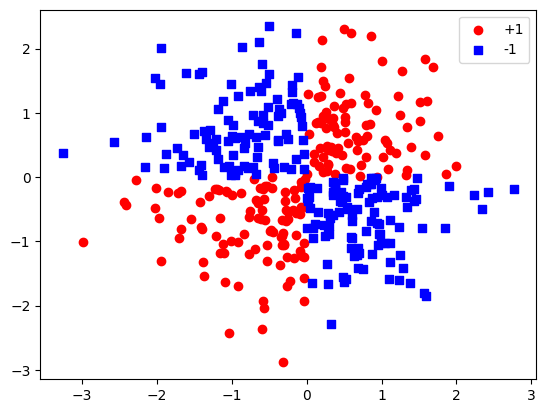

In [170]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

Gamma with 0.1

<span style="color:red">Insert your code below</span>.

(<Figure size 640x480 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x2936b2380>)

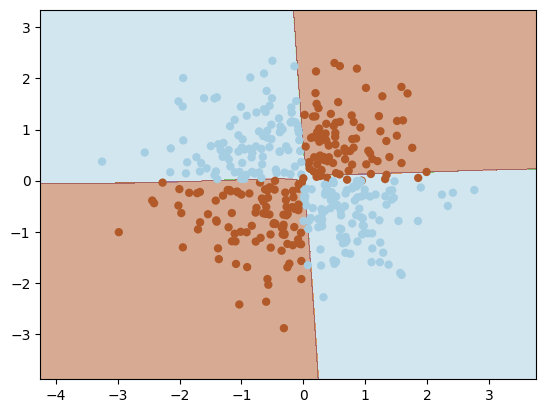

In [171]:
################################
# Your code here

# rbf kernel with gamma as 0.1
model = svm.SVC(kernel='rbf', C=1, gamma=0.1) 
model.fit(X_r, y_r)

plot_decision_boundary(X_r, y_r, model)

Gamma with 100

(<Figure size 640x480 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x2935d74c0>)

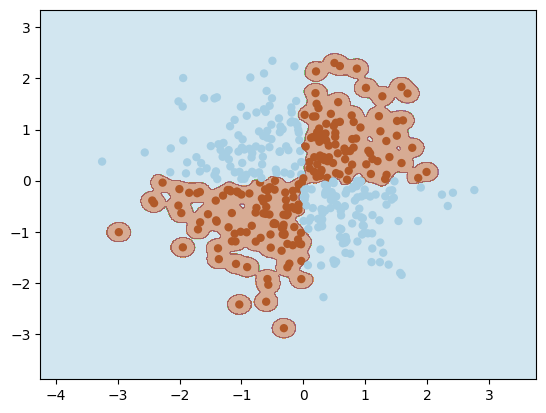

In [172]:
################################
# Your code here

# rbf kernel with gamma as 100
model = svm.SVC(kernel='rbf', C=1, gamma=100) 
model.fit(X_r, y_r)

plot_decision_boundary(X_r, y_r, model)

Change the gamma value to 100. What happens? What is the problem with this result?  

The problem with the above 2 figures are :
1. The first one with gamma as 0.1 is that it leads to a broad classification(assumes that anything on the left bottom and right top would belong to one class and the remainder to the other). It has a large influence area and leads to underfitting, hence resulting in poor generalization. ie. high bias and low variance
2. The second one with gamma as 100 is that it leads to less-generalized classification as it is model that does overfitting on the data as is clearly visible from the points on (-0.5, - 3.2) and (-1, -2.8). The model is having high variance hence it categorises the point mentioned above with its own boundaries and excludes the gap in between. It has a small influence area, even though it has a higher accuracy for the training data. Also evident from the gap in the (-0.9, -1.4) that the space is allocated for the other class.

Gamma with 4

(<Figure size 640x480 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x2934a5db0>)

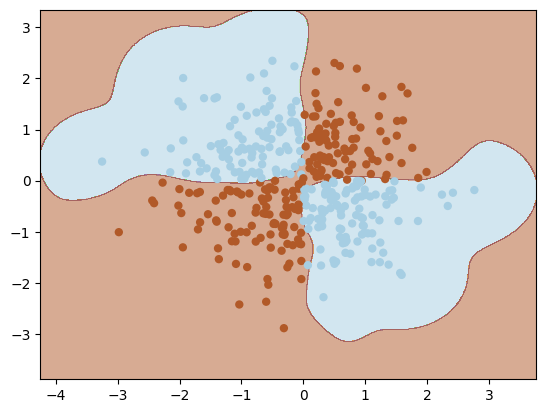

In [173]:
################################
# Your code here

# rbf kernel with gamma as 0.1
model = svm.SVC(kernel='rbf', C=0.5, gamma=4) # this model with rbf kernel that has C = 0.5 and gamma as 4 is what I believe to be a better fit that the above 2 examples as this allows for a better classification of the data where the boundary allows for a little missclassification and yet assumes as clarer bias.
model.fit(X_r, y_r)

plot_decision_boundary(X_r, y_r, model)

Multi-class Iris data, to provide a multi-class, nonlinear solution 

The accuracy score with svm.SVC is 0.9333333333333333  when the gamma value is  0.01
The accuracy score with svm.SVC is 0.9555555555555556  when the gamma value is  1
The accuracy score with svm.SVC is 0.8888888888888888  when the gamma value is  100


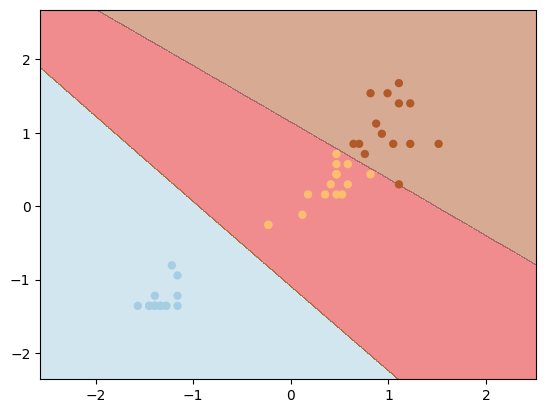

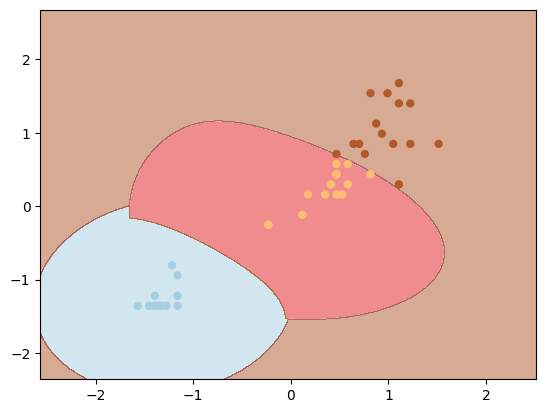

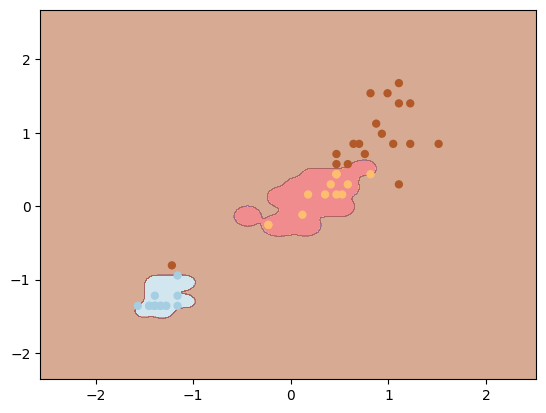

In [174]:
################################
# Your code here

import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

################################
# Your code here

def svmWithGammaValue(gamma) :
    df = pd.read_csv('iris_data.csv', header=0)
    X = df.iloc[:, [2,3]]
    y = df.iloc[:, 4]

    class_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
    y = df[' class'] = y.map(class_mapping)

    # using svm.SVC with linear kernel
    clf = svm.SVC(kernel='rbf', C = 1, gamma=gamma, decision_function_shape='ovo')

    # using stratify to get 33% of each Iris data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)

    X_test_scaled = scaler.fit(X_test)
    X_test_scaled = scaler.transform(X_test)

    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)


    print("The accuracy score with svm.SVC is", accuracy_score(y_test, y_pred), " when the gamma value is ", gamma) # calculating accuracy

    plot_decision_boundary(X_test_scaled, y_pred, clf) # plot decision boundary

svmWithGammaValue(.01)
svmWithGammaValue(1)
svmWithGammaValue(100)
